In [1]:

! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oksanabolibok","key":"dd21adf2692aeab31138828464442152"}'}

In [4]:
! mkdir ~/.kaggle



In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d quadeer15sh/celeba-face-recognition-triplets

100% 228M/229M [00:12<00:00, 17.2MB/s]
100% 229M/229M [00:12<00:00, 19.3MB/s]


In [ ]:
! unzip celeba-face-recognition-triplets.zip -d celeba

In [9]:
import tensorflow as tf
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input, Layer,Conv2D, ReLU, Lambda,Add
from PIL import Image



In [ ]:
def plot_training_history(history):
    # Plot training loss
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot training PSNR
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['psnr'], label='Training PSNR')
    plt.xlabel('Epoch')
    plt.ylabel('PSNR (dB)')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
dataset_folder = 'celeba/CelebA FR Triplets'

In [ ]:
def calculate_rgb_mean(folder_path):
    total_sum = np.zeros(3)
    total_pixels = 0

    for filename in os.listdir(folder_path):
        img = cv2.cvtColor(cv2.imread(os.path.join(folder_path, filename)), cv2.COLOR_BGR2RGB)
        total_sum += np.sum(img, axis=(0, 1))
        total_pixels += img.shape[0] * img.shape[1]

    return (total_sum / total_pixels) / 256

In [ ]:
def calculate_rgb_mean(dataset):
    total_sum = np.zeros(3)
    total_pixels = 0

    for image in dataset:
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        total_sum += np.sum(img, axis=(0, 1))
        total_pixels += img.shape[0] * img.shape[1]

    return (total_sum / total_pixels) / 256

In [ ]:
celeba_folder = 'celeba/CelebA FR Triplets/images'

In [ ]:
# Assuming this is a classification task and
# your dataset has multiple classes
images = []
image_shapes = []

for path in os.listdir(celeba_folder):
    image_path = os.path.join(celeba_folder, path)
    image = cv2.imread(image_path)

    # Convert to RGB as OpenCV uses BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

    # Obtain shape of each image and store them in an array
    (width, height) = image.shape[1], image.shape[0]
    image_shapes.append((width, height))

# Return only unique shapes
unique_shapes = list(set(image_shapes))


In [ ]:
print(unique_shapes)

[(76, 107), (96, 122), (88, 118), (107, 131), (99, 127), (77, 108), (69, 104), (80, 113), (33, 38), (91, 128), (83, 124), (102, 137), (94, 133), (73, 110), (72, 114), (84, 125), (103, 138), (95, 134), (87, 130), (88, 95), (76, 120), (79, 131), (98, 144), (90, 140), (81, 91), (73, 87), (91, 141), (84, 102), (95, 111), (87, 107), (76, 97), (96, 112), (88, 108), (99, 117), (86, 147), (98, 121), (58, 85), (77, 98), (69, 94), (101, 126), (80, 103), (91, 118), (83, 114), (102, 127), (75, 110), (94, 123), (72, 104), (84, 115), (95, 124), (87, 120), (97, 133), (76, 110), (109, 144), (79, 121), (98, 134), (71, 117), (90, 130), (82, 126), (101, 139), (91, 131), (104, 150), (83, 127), (84, 92), (75, 123), (94, 136), (105, 151), (76, 87), (88, 98), (98, 111), (89, 142), (90, 107), (80, 93), (91, 108), (83, 104), (75, 100), (94, 113), (72, 94), (105, 128), (84, 105), (116, 137), (87, 110), (86, 114), (65, 91), (97, 123), (76, 100), (89, 119), (79, 111), (98, 124), (90, 120), (82, 116), (101, 129), 

In [ ]:
def variance_of_laplacian(image):
  return cv2.Laplacian(image, cv2.CV_64F).var()

In [ ]:
variance_of_laplacian(images[5])

49.79772288829844

Text(0.5, 1.0, 'Low LaplacianFilter of  Image')

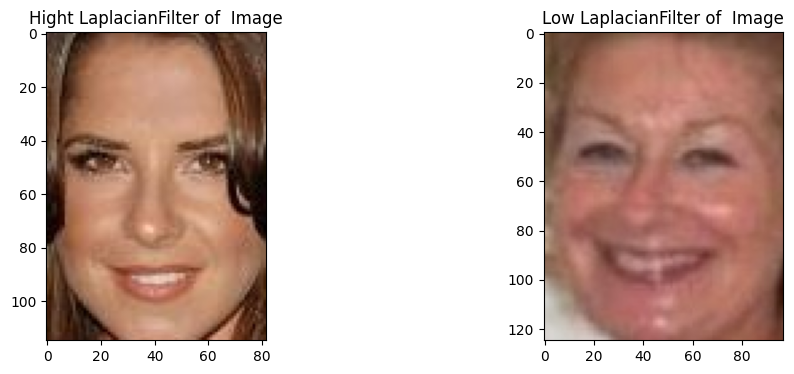

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.title('Hight LaplacianFilter of  Image')
plt.subplot(1, 2, 2)
plt.imshow(images[5])
plt.title('Low LaplacianFilter of  Image')

In [ ]:
hr_full_dataset = []

In [ ]:
hr_size = 64
lr_size = 32

In [ ]:
full_dataset_folder = "dataset"

In [ ]:
os.makedirs(full_dataset_folder, exist_ok=True)

In [ ]:
for idx, image in enumerate(images):
  if (image.shape[0]>=64 | image.shape[1]>=64) & (variance_of_laplacian(image) > 500):
    img_hr = cv2.resize(image, (hr_size, hr_size))
    hr_full_dataset.append(img_hr)
    hr_save_path = os.path.join(full_dataset_folder, str(idx)+'.jpg')
    cv2.imwrite(hr_save_path, cv2.cvtColor(img_hr, cv2.COLOR_RGB2BGR))

In [ ]:
len(hr_full_dataset)

26866

In [ ]:
hr_images_shapes = []
for  img in hr_full_dataset:
   (width, height) = img.shape[1], img.shape[0]
   hr_images_shapes.append((width, height))

unique_hr_img_shapes = list(set(hr_images_shapes))

In [ ]:
unique_hr_img_shapes

[(64, 64)]

In [ ]:
celeba_rgb_mean = calculate_rgb_mean(hr_full_dataset)

In [ ]:
# Print the calculated RGB mean
print("CelebA RGB Mean:", celeba_rgb_mean)

CelebA RGB Mean: [0.40009299 0.47962609 0.64333589]


In [ ]:
celeba_images = [filename for filename in os.listdir(full_dataset_folder)]


In [ ]:
len(celeba_images)

26866

In [ ]:
train_images, test_images = train_test_split(celeba_images, test_size=0.2, random_state=42)

In [ ]:
# Define the paths to store the train and test data
train_hr_folder = 'train_data/hr'
train_lr_folder = 'train_data/lr'
test_hr_folder = 'test_data/hr'
test_lr_folder = 'test_data/lr'


In [ ]:
train_folder = 'train_data'
test_folder = 'test_data'

In [ ]:
# Create the directories if they don't exist
os.makedirs(train_hr_folder, exist_ok=True)
os.makedirs(train_lr_folder, exist_ok=True)
os.makedirs(test_hr_folder, exist_ok=True)
os.makedirs(test_lr_folder, exist_ok=True)

In [ ]:
def normalize(x, rgb_mean=celeba_rgb_mean):
    return (x - rgb_mean) / 127.5


In [ ]:
def denormalize(x, rgb_mean=celeba_rgb_mean):
    return x * 127.5 + rgb_mean

In [ ]:
# Helper function for pixel shuffle
def pixel_shuffle(scale):
    return lambda x: tf.nn.depth_to_space(x, scale)


In [ ]:
def res_block(x_in, filters, scaling):
    # First convolutional layer in the residual block with ReLU activation
    x = Conv2D(filters, 3, padding='same', activation='relu')(x_in)

    # Second convolutional layer in the residual block
    x = Conv2D(filters, 3, padding='same')(x)

    # Optionally, apply scaling to the residual block output
    if scaling:
        x = Lambda(lambda t: t * scaling)(x)

    # Add the input of the residual block to its output (skip connection)
    x = Add()([x_in, x])

    # Return the output of the residual block
    return x


In [ ]:
def edsr(scale, num_filters=64, num_res_blocks=8, res_block_scaling=None):
    # Input layer for the low-resolution image
    x_in = Input(shape=(None, None, 3))

    # Normalize the input image
    x = Lambda(normalize)(x_in)

    # Initial convolutional layer with the specified number of filters
    x = b = Conv2D(num_filters, 3, padding='same')(x)

    # Residual blocks
    for i in range(num_res_blocks):
        b = res_block(b, num_filters, res_block_scaling)

    # Final convolutional layer in the residual block pathway
    b = Conv2D(num_filters, 3, padding='same')(b)

    # Skip connection (element-wise addition) to merge the original input with the residual blocks output
    x = Add()([x, b])

    # Upsampling layer to increase the resolution of the image
    x = upsample(x, scale, num_filters)

    # Final convolutional layer to generate the high-resolution output
    x = Conv2D(3, 3, padding='same')(x)

    # Denormalize the output image
    x = Lambda(denormalize)(x)

    # Create and return the EDSR model
    return Model(x_in, x, name="edsr")


In [ ]:
def upsample(x, scale, num_filters):
    # Helper function for upsampling
    def upsample_1(x, factor, **kwargs):
        # Convolutional layer to increase the number of channels
        x = Conv2D(num_filters * (factor ** 2), 3, padding='same', **kwargs)(x)
        # Pixel shuffle to increase the spatial resolution
        return Lambda(pixel_shuffle(scale=factor))(x)

    # Choose the appropriate upsampling method based on the scale factor
    if scale == 2:
        x = upsample_1(x, 2, name='conv2d_1_scale_2')
    elif scale == 3:
        x = upsample_1(x, 3, name='conv2d_1_scale_3')
    elif scale == 4:
        x = upsample_1(x, 2, name='conv2d_1_scale_2')
        x = upsample_1(x, 2, name='conv2d_2_scale_2')

    # Return the upsampled output
    return x


In [ ]:
def psnr(x1, x2):
    return tf.image.psnr(x1, x2, max_val=255)

In [ ]:
def load_and_save_images(image_filename, folder_path, size, target_folder):
    img = cv2.cvtColor(cv2.imread(os.path.join(folder_path, image_filename)), cv2.COLOR_BGR2RGB)
    img_hr = cv2.resize(img, (size, size))
    img_lr = cv2.resize(img, (size // 2, size // 2))  # Downsample for LR

    # Save high-resolution image
    hr_save_path = os.path.join(target_folder, 'hr', image_filename)

    cv2.imwrite(hr_save_path, cv2.cvtColor(img_hr, cv2.COLOR_RGB2BGR))

    # Save low-resolution image
    lr_save_path = os.path.join(target_folder, 'lr', image_filename)
    cv2.imwrite(lr_save_path, cv2.cvtColor(img_lr, cv2.COLOR_RGB2BGR))

In [ ]:
def load_images_from_folder(folder_path):
    image_list = []
    for filename in os.listdir(folder_path):
        img = cv2.cvtColor(cv2.imread(os.path.join(folder_path, filename)), cv2.COLOR_BGR2RGB)
        image_list.append(img)
    return np.array(image_list)

In [ ]:
# Save train images to corresponding folders
print("Saving train images...")
for image_filename in train_images:
    image_path = os.path.join(full_dataset_folder, image_filename)
    load_and_save_images(image_filename, full_dataset_folder, size=64, target_folder=train_folder)


Saving train images...


In [ ]:
# Save test images to corresponding folders
print("Saving test images...")
for image_filename in test_images:
    image_path = os.path.join(full_dataset_folder, image_filename)
    load_and_save_images(image_filename, full_dataset_folder, size=32, target_folder=test_folder)


Saving test images...


In [ ]:
train_hr_images = load_images_from_folder(train_hr_folder)
train_lr_images = load_images_from_folder(train_lr_folder)

# Load HR and LR images from test folders
test_hr_images = load_images_from_folder(test_hr_folder)
test_lr_images = load_images_from_folder(test_lr_folder)

In [ ]:
scale_factor = 2      # Scaling factor for super-resolution (e.g., 2, 3, 4)
num_filters = 64      # Number of filters in the convolutional layers
num_res_blocks = 8    # Number of residual blocks in the model
res_block_scaling = 0.1

In [ ]:
edsr_model = edsr(scale=scale_factor, num_filters=num_filters, num_res_blocks=num_res_blocks, res_block_scaling=res_block_scaling)

In [ ]:
edsr_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[psnr])

In [ ]:
epochs = 100        # Number of training epochs
batch_size = 16    # Batch size for training
validation_split = 0.1

In [ ]:
history = edsr_model.fit(train_lr_images, train_hr_images, batch_size=batch_size, epochs=epochs, validation_split=validation_split)


Epoch 1/100
1209/1209 [==============================] - 48s 27ms/step - loss: 157.2401 - psnr: 28.5684 - val_loss: 75.1669 - val_psnr: 29.6489
Epoch 2/100
1209/1209 [==============================] - 29s 24ms/step - loss: 72.1869 - psnr: 29.8088 - val_loss: 69.5554 - val_psnr: 29.9976
Epoch 3/100
1209/1209 [==============================] - 29s 24ms/step - loss: 70.2204 - psnr: 29.9514 - val_loss: 66.7596 - val_psnr: 30.1847
Epoch 4/100
1209/1209 [==============================] - 30s 24ms/step - loss: 66.4354 - psnr: 30.1909 - val_loss: 64.6021 - val_psnr: 30.3359
Epoch 5/100
1209/1209 [==============================] - 29s 24ms/step - loss: 66.3865 - psnr: 30.2517 - val_loss: 62.0848 - val_psnr: 30.5178
Epoch 6/100
1209/1209 [==============================] - 30s 25ms/step - loss: 61.9417 - psnr: 30.4995 - val_loss: 74.9567 - val_psnr: 29.6132
Epoch 7/100
1209/1209 [==============================] - 30s 24ms/step - loss: 5246.7520 - psnr: 27.2680 - val_loss: 118.5977 - val_psnr: 27.

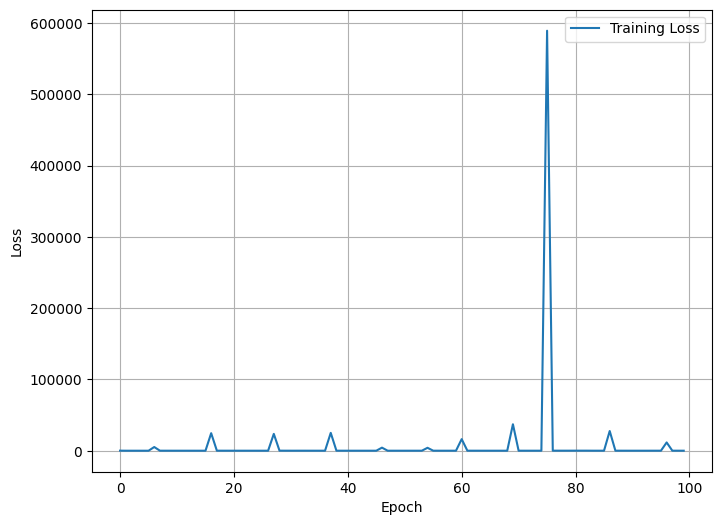

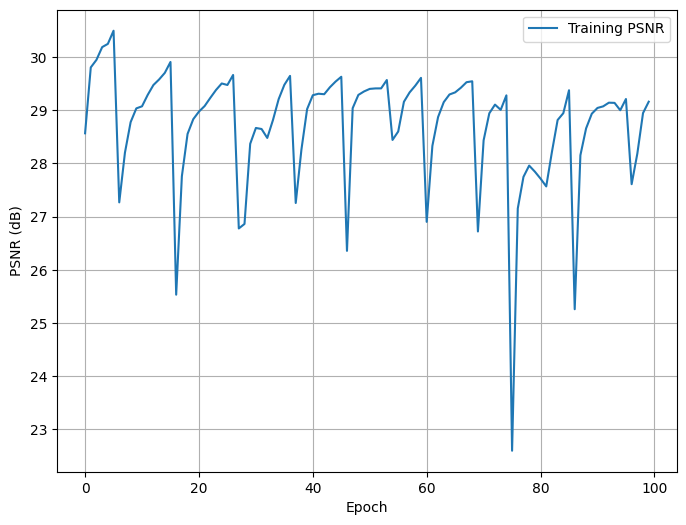

In [ ]:
plot_training_history(history)

In [ ]:
test_loss, test_accuracy = edsr_model.evaluate(test_lr_images, test_hr_images)

168/168 [==============================] - 2s 7ms/step - loss: 259.1031 - psnr: 24.2533


In [ ]:
def predict_image(model, lr_image):
    # Normalize the input low-resolution image to [0, 1]
    lr_image_normalized = normalize(lr_image)

    # Add batch dimension to the input image
    lr_image_normalized = np.expand_dims(lr_image_normalized, axis=0)

    # Perform prediction using the model
    predicted_hr_image_normalized = model.predict(lr_image_normalized)


    ## Denormalize the predicted high-resolution image to [0, 255]

    predicted_hr_image = np.clip(denormalize(predicted_hr_image_normalized[0]), 0, 255).astype(np.uint8)

    return predicted_hr_image


In [ ]:
# Example: Predict and show a result for the first test image
test_image_index = 0
input_lr_image = test_lr_images[test_image_index]
input_hr_image = test_hr_images[test_image_index]
predicted_hr_image = predict_image(edsr_model, input_lr_image)

1/1 [==============================] - 0s 466ms/step


In [ ]:
predicted_hr_image.min(), predicted_hr_image.max()

(0, 255)

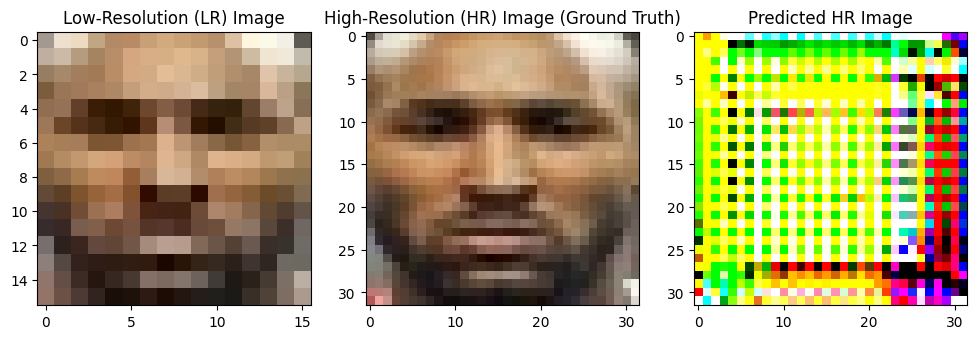

In [ ]:
# Display the images side by side using matplotlib
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(input_lr_image)
plt.title('Low-Resolution (LR) Image')
plt.subplot(1, 3, 2)
plt.imshow(input_hr_image)
plt.title('High-Resolution (HR) Image (Ground Truth)')
plt.subplot(1, 3, 3)
plt.imshow(predicted_hr_image)
plt.title('Predicted HR Image')
plt.show()


As we can see this method  did not give the desired result.

## Second  way

**Data Processing**

In [81]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

crop_size = 64  # High-resolution image size
upscale_factor = 2  # Upscaling factor (64x64 to 32x32)
input_size = crop_size // upscale_factor
batch_size = 8

datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_ds = image_dataset_from_directory(
    'celeba/CelebA FR Triplets/images',
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.2,
    subset="training",
    seed=1337,
    label_mode=None
)

valid_ds = image_dataset_from_directory(
    'celeba/CelebA FR Triplets/images',
    batch_size=batch_size,
    image_size=(crop_size, crop_size),
    validation_split=0.2,
    subset="validation",
    seed=1337,
    label_mode=None
)



Found 46371 files belonging to 1 classes.
Using 37097 files for training.
Found 46371 files belonging to 1 classes.
Using 9274 files for validation.


We should normilize dataset. Also we will convert rgb to yuv images

In [82]:
def scaling(input_image):
    # Scale from (0, 255) to (0, 1)
    input_image = input_image / 255.0
    return input_image

# Apply scaling to the datasets
train_ds = train_ds.map(scaling)
valid_ds = valid_ds.map(scaling)

# Use TF Ops to process.
def process_input(input, input_size, upscale_factor):
    input = tf.image.rgb_to_yuv(input)
    last_dimension_axis = len(input.shape) - 1
    y, u, v = tf.split(input, 3, axis=last_dimension_axis)
    return tf.image.resize(y, [input_size, input_size], method="bicubic")


def process_target(input):
    input = tf.image.rgb_to_yuv(input)
    last_dimension_axis = len(input.shape) - 1
    y, u, v = tf.split(input, 3, axis=last_dimension_axis)
    return y


train_ds = train_ds.map(
    lambda x: (process_input(x, input_size, upscale_factor), process_target(x))
)
train_ds = train_ds.prefetch(buffer_size=32)

valid_ds = valid_ds.map(
    lambda x: (process_input(x, input_size, upscale_factor), process_target(x))
)
valid_ds = valid_ds.prefetch(buffer_size=32)


In [85]:
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import img_to_array

In [ ]:
for batch in train_ds.take(1):
    for img in batch[0]:
      display(array_to_img(img))
    for img in batch[1]:
        display(array_to_img(img))

**Model trainig**

In [87]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img

def get_model(upscale_factor=2, channels=1):
    conv_args = {
        "activation": "relu",
        "kernel_initializer": "Orthogonal",
        "padding": "same",
    }
    inputs = keras.Input(shape=(input_size, input_size, channels))
    x = layers.Conv2D(64, 5, **conv_args)(inputs)
    x = layers.Conv2D(64, 3, **conv_args)(x)
    x = layers.Conv2D(32, 3, **conv_args)(x)
    x = layers.Conv2D(channels * (upscale_factor ** 2), 3, **conv_args)(x)
    outputs = tf.nn.depth_to_space(x, upscale_factor)

    return keras.Model(inputs, outputs)


In [88]:
model = get_model(upscale_factor=upscale_factor, channels=1)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1664      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 4)         1156      
                                                                 
 tf.nn.depth_to_space_1 (TFO  (None, 64, 64, 1)        0         
 pLambda)                                                        
                                                           

In [16]:
loss_fn = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [17]:
epochs = 10

model.compile(optimizer=optimizer, loss=loss_fn)

history = model.fit(train_ds, epochs=epochs, validation_data=valid_ds, verbose=2)


Epoch 1/10
4638/4638 - 39s - loss: 0.0012 - val_loss: 7.7502e-04 - 39s/epoch - 8ms/step
Epoch 2/10
4638/4638 - 28s - loss: 7.7272e-04 - val_loss: 7.4264e-04 - 28s/epoch - 6ms/step
Epoch 3/10
4638/4638 - 27s - loss: 7.3213e-04 - val_loss: 7.0763e-04 - 27s/epoch - 6ms/step
Epoch 4/10
4638/4638 - 27s - loss: 7.0798e-04 - val_loss: 6.9752e-04 - 27s/epoch - 6ms/step
Epoch 5/10
4638/4638 - 29s - loss: 6.9444e-04 - val_loss: 6.7753e-04 - 29s/epoch - 6ms/step
Epoch 6/10
4638/4638 - 27s - loss: 6.8336e-04 - val_loss: 6.7189e-04 - 27s/epoch - 6ms/step
Epoch 7/10
4638/4638 - 28s - loss: 6.7533e-04 - val_loss: 6.6320e-04 - 28s/epoch - 6ms/step
Epoch 8/10
4638/4638 - 27s - loss: 6.7052e-04 - val_loss: 6.5579e-04 - 27s/epoch - 6ms/step
Epoch 9/10
4638/4638 - 28s - loss: 6.6474e-04 - val_loss: 6.5912e-04 - 28s/epoch - 6ms/step
Epoch 10/10
4638/4638 - 28s - loss: 6.5949e-04 - val_loss: 6.5992e-04 - 28s/epoch - 6ms/step


After 10 epochs we have pretty well model and low loss

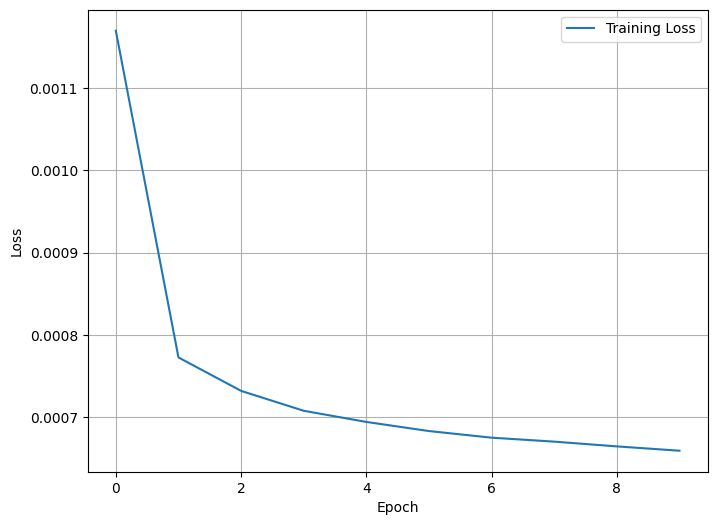

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [19]:
eval_res = model.evaluate(valid_ds)

1160/1160 [==============================] - 6s 5ms/step - loss: 6.5992e-04


In [28]:
predicted = model.predict(valid_ds)

1160/1160 [==============================] - 4s 3ms/step


In [25]:
val_hr_images  = []
val_lr_images  = []

In [26]:
for batch in valid_ds.take(1):
    for img in batch[0]:
      val_lr_images.append(array_to_img(img))
    for img in batch[1]:
      val_hr_images.append(array_to_img(img))


In [45]:
# Example: Predict and show a result for the first test image
test_image_index = 0
lr_image = val_lr_images[test_image_index]
hr_image = val_hr_images[test_image_index]
predicted_hr_image = predicted[37]

In [65]:
from matplotlib.pyplot import imshow

Text(0.5, 1.0, 'Predicted')

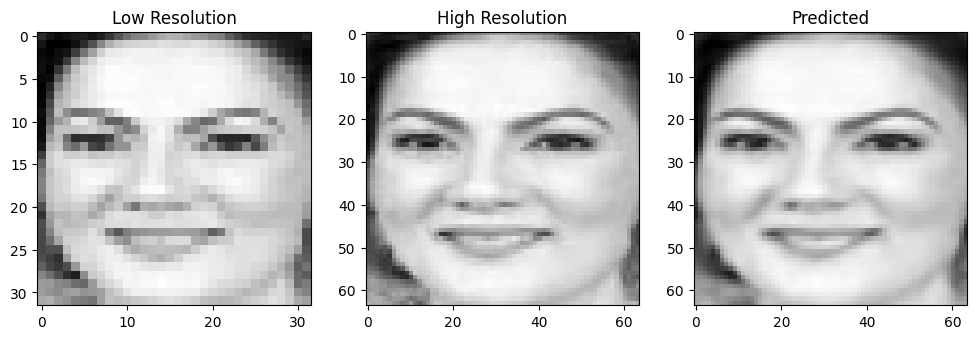

In [72]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(lr_image,cmap='gray', vmin=0, vmax=255)
plt.title('Low Resolution')
plt.subplot(1, 3, 2)
plt.imshow(hr_image,cmap='gray', vmin=0, vmax=255)
plt.title('High Resolution')
plt.subplot(1, 3, 3)
plt.imshow(array_to_img(predicted_hr_image),cmap='gray', vmin=0, vmax=255)
plt.title('Predicted')



# **Conclution**

*We got a pretty good model with a small error and a nice visual effect. This model could also be improved by hyperparameter fitting and increasing the number of epochs*